In [1]:
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.io import loadmat
import os
from pywt import wavedec
from scipy import signal
from scipy.stats import entropy
from scipy.fft import fft, ifft
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras as K
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_validate
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional, BatchNormalization, PReLU, ReLU, Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from tensorflow import keras
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\sendm\\Downloads\\archive (2)\\emotions.csv")
data.head()


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [3]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']

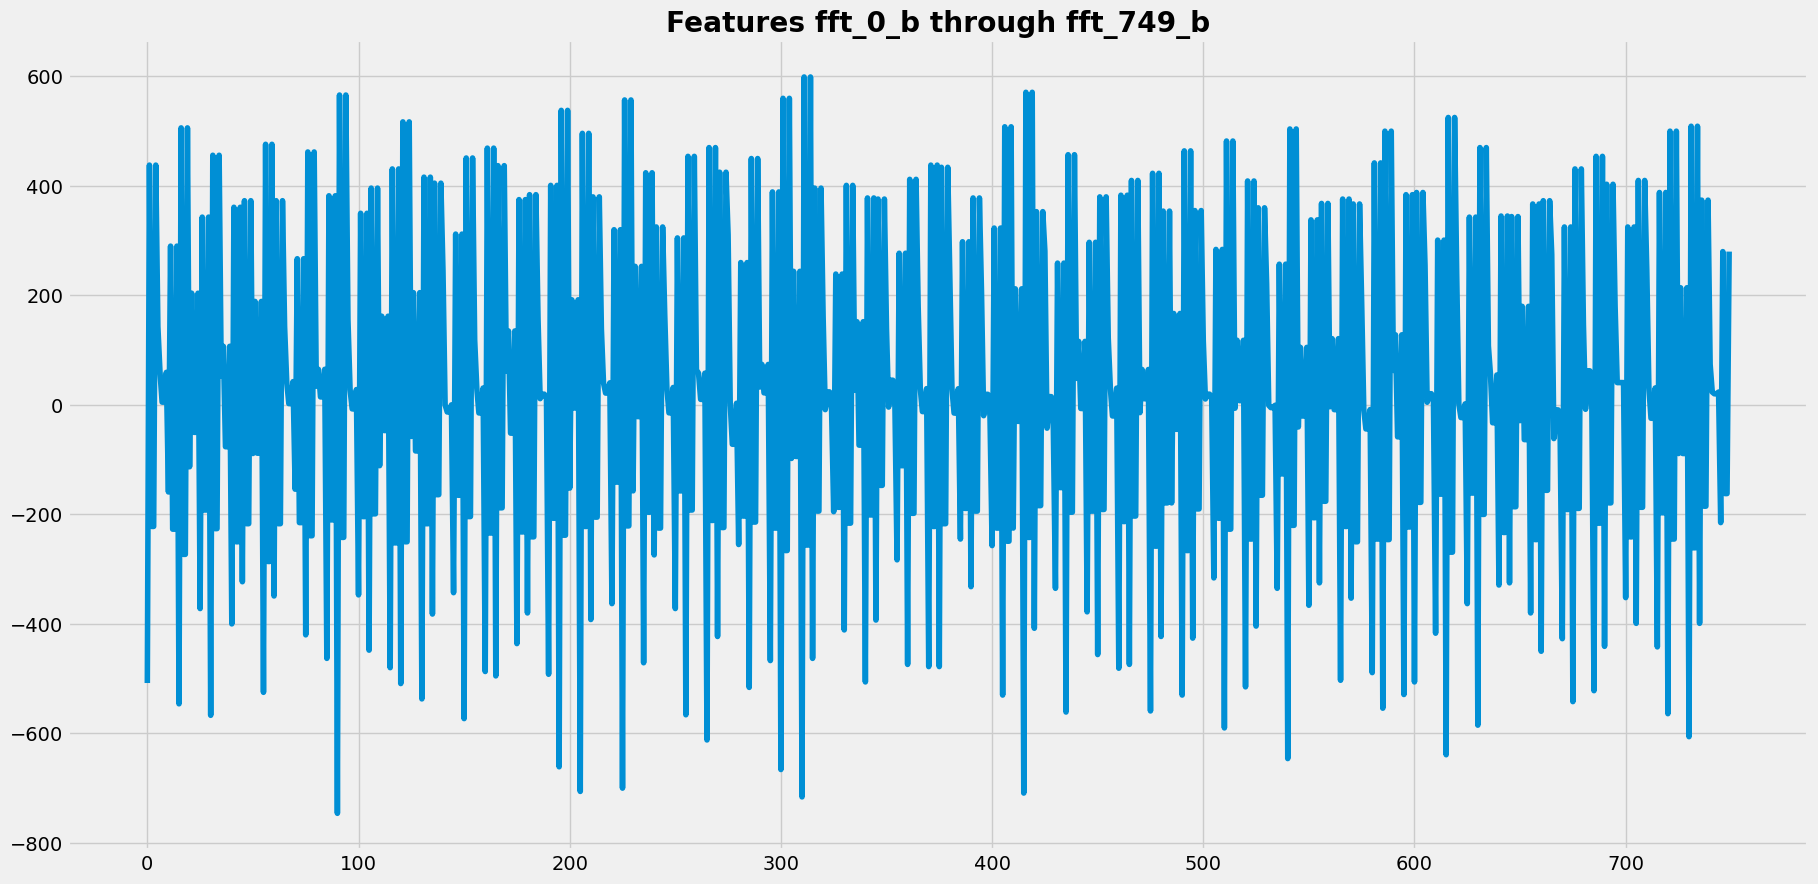

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.plot(range(len(sample)),sample)
plt.title("Features fft_0_b through fft_749_b",weight='bold',color='black')
plt.show()


In [5]:
 fft_data = data.loc[:,'fft_0_b':'fft_749_b']
fft_data

,fft_0_b,fft_1_b,fft_2_b,fft_3_b,fft_4_b,fft_5_b,fft_6_b,fft_7_b,fft_8_b,fft_9_b,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,-508.0,438.00,-222.00,-222.00,438.00,143.0,59.40,5.05,5.05,59.40,...,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00
1,126.0,-4.00,7.42,7.42,-4.00,81.6,-22.30,35.30,35.30,-22.30,...,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57
2,-85.9,361.00,-62.20,-62.20,361.00,-558.0,684.00,-152.00,-152.00,684.00,...,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00
3,69.5,3.89,12.10,12.10,3.89,-188.0,274.00,-200.00,-200.00,274.00,...,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40
4,226.0,-27.40,147.00,147.00,-27.40,301.0,-8.48,138.00,138.00,-8.48,...,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,105.0,3.37,29.20,29.20,3.37,151.0,-19.40,8.89,8.89,-19.40,...,155.0,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90
2128,-23.0,202.00,-81.60,-81.60,202.00,-345.0,404.00,-205.00,-205.00,404.00,...,-661.0,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00
2129,-288.0,312.00,-259.00,-259.00,312.00,-186.0,276.00,-199.00,-199.00,276.00,...,-232.0,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00
2130,109.0,2.48,49.00,49.00,2.48,-230.0,216.00,-92.40,-92.40,216.00,...,-99.7,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00


In [6]:
data.columns.unique()

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['label']=le.fit_transform(data['label'])


In [8]:
y = data.pop('label')
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=48)
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
X_test = np.array(X_test).reshape((X_test.shape[0],X_test.shape[1],1))
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)


In [9]:
from keras.layers import Flatten
from keras.layers import Dense
inputs = tf.keras.Input(shape=(X_train.shape[1],1))
gru = tf.keras.layers.GRU(512, return_sequences=True)(inputs)
flat = Flatten()(gru)
outputs = Dense(3, activation='softmax')(flat)
model = tf.keras.Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 gru (GRU)                   (None, 2548, 512)         789504    
                                                                 
 flatten (Flatten)           (None, 1304576)           0         
                                                                 
 dense (Dense)               (None, 3)                 3913731   
                                                                 
Total params: 4,703,235
Trainable params: 4,703,235
Non-trainable params: 0
_________________________________________________________________


In [10]:
import pydot
graph = pydot.Dot()


In [11]:
def train_model(model, x_train, y_train, x_test, y_test, save_to, epoch = 2):
     
        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode ='max', verbose=1, save_best_only=True)

        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        model.compile(optimizer=opt_adam, loss=['categorical_crossentropy'],metrics=['accuracy'])
 
        history = model.fit(x_train, y_train, batch_size=32, epochs = epoch, validation_data = (x_test, y_test), callbacks = [es, mc, lr_schedule])
    
        saved_model = load_model(save_to + '_best_model.h5') 

        return model, history

In [12]:
 model,history = train_model(model, X_train, y_train, X_test, y_test, save_to= './', epoch = 3) 

Epoch 1/3
47/47 [==============================] - ETA: 0s - loss: 65.2291 - accuracy: 0.7849  
Epoch 1: val_accuracy improved from -inf to 0.93750, saving model to .\_best_model.h5
47/47 [==============================] - 6602s 142s/step - loss: 65.2291 - accuracy: 0.7849 - val_loss: 4.7345 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 2/3
47/47 [==============================] - ETA: 0s - loss: 7.7906 - accuracy: 0.9323  
Epoch 2: val_accuracy improved from 0.93750 to 0.94219, saving model to .\_best_model.h5
47/47 [==============================] - 8848s 189s/step - loss: 7.7906 - accuracy: 0.9323 - val_loss: 5.0183 - val_accuracy: 0.9422 - lr: 9.0484e-04
Epoch 3/3
47/47 [==============================] - ETA: 0s - loss: 2.1283 - accuracy: 0.9685  
Epoch 3: val_accuracy improved from 0.94219 to 0.96875, saving model to .\_best_model.h5
47/47 [==============================] - 10403s 222s/step - loss: 2.1283 - accuracy: 0.9685 - val_loss: 2.8949 - val_accuracy: 0.9688 - lr: 8.1873e-04


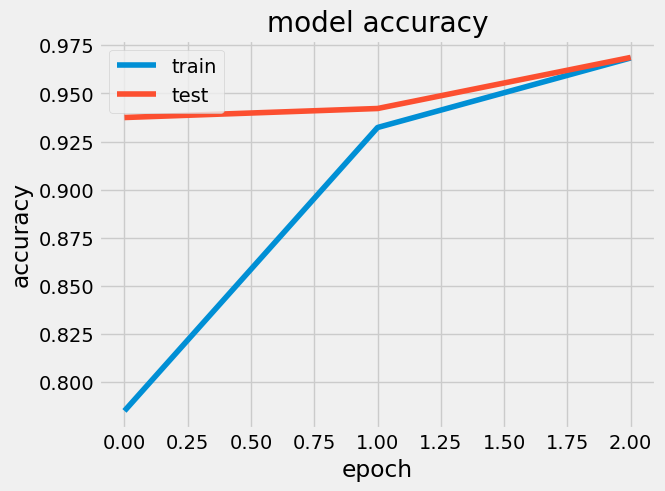

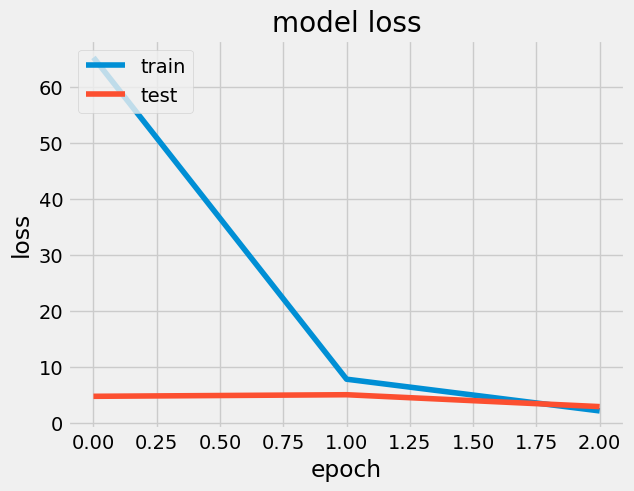

In [13]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 

plt.title('model accuracy') #
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [14]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 96.875%


20/20 [==============================] - 347s 17s/step


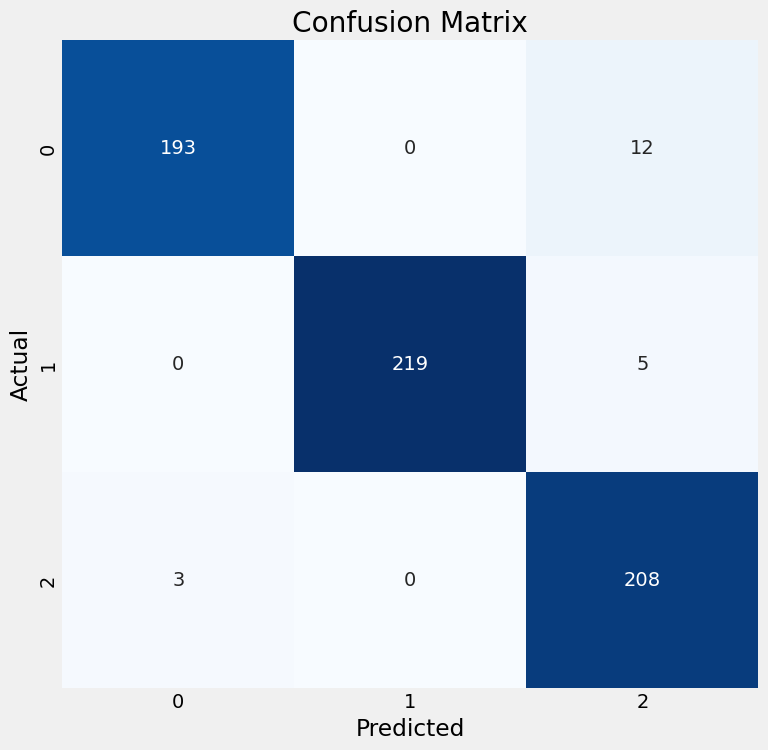

In [15]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
y_test = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
print("Classification Report:\n----------------------\n", clr)


Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       205
           1       1.00      0.98      0.99       224
           2       0.92      0.99      0.95       211

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640

